<p align="center"><h1 align="center">QMSS5074GR <br> Projects in Advanced Machine Learning <br>Spring 2024 <br>Assignment 2 [GROUP PROJECT]</h1>

---
<br>

#### (Change Unis in the title of your notebook. The format should be `assignment2_GRPID_UNI1_UNI2... UNIn.ipynb`)
#### **Your Unis** : yc4336
#### **Your Full names** : Cynthia Chen
#### **Your AI Model Share Usernames**: cyn_chen
#### **Link to your Public Github repository** : https://github.com/cyn-chen01/assignment2_GRP4_yc4336
#### **Team member Contribution Percentages** : N/A

---


# **STEP 1: Import packages and extract the dataset**

**Download the zip file and upload the zip file to drive.**

In [ ]:
# Connect to google drive
import os
from google.colab import drive
drive.mount('/content/drive')

# content in your drive is now available via "/content/drive/My Drive"

# Import data and unzip files to folder
!unzip /content/drive/MyDrive/COVID-19_Radiography_Dataset.zip

In [2]:
# Load libraries and then download data

import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3


# **STEP 2: Prepare the dataset**

In [3]:
# Extracting all filenames iteratively
base_path = 'COVID-19_Radiography_Dataset'
categories = ['COVID/images', 'Normal/images', 'Viral Pneumonia/images']


# load file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)


print('number of images for each category:', [len(f) for f in fnames])
print(fnames[0:2]) #examples of file names

number of images for each category: [3616, 10192, 1345]
[['COVID-19_Radiography_Dataset/COVID/images/COVID-1285.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-262.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-140.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3418.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3074.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2811.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3484.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2481.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-656.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1114.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3244.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-104.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-580.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1259.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-128.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID

In [4]:
#Reduce number of images to first 1345 for each category
fnames[0] = fnames[0][0:1344]
fnames[1] = fnames[1][0:1344]
fnames[2] = fnames[2][0:1344]

In [5]:
# Import image, load to array of shape height, width, channels, then min/max transform.
# Write preprocessor that will match up with model's expected input shape.
from keras.preprocessing import image
import numpy as np
from PIL import Image



def preprocessor(img_path):
        img = Image.open(img_path).convert("RGB").resize((192,192)) # import image, make sure it's RGB and resize to height and width you want.
        img = (np.float32(img)-1.)/(255-1.) # min max transformation
        img=img.reshape((192,192,3)) # Create final shape as array with correct dimensions for Keras
        return img



#Try on single file (imports file and preprocesses it to data with following shape)
preprocessor('COVID-19_Radiography_Dataset/COVID/images/COVID-2273.png').shape

(192, 192, 3)

In [11]:
#Import image files iteratively and preprocess them into array of correctly structured data
# Create list of file paths
image_filepaths=fnames[0]+fnames[1]+fnames[2]


# Iteratively import and preprocess data using map function
# map functions apply your preprocessor function one step at a time to each filepath
preprocessed_image_data=list(map(preprocessor, image_filepaths))


# Object needs to be an array rather than a list for Keras (map returns to list object)
X = np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model

In [8]:
print(len(X) )          # same number of elements as filenames

print(X.shape )         # dimensions now 192,192,3 for all images

print(X.min().round() ) # min value of every image is zero

print(X.max() )         # max value of every image is one

4032
(4032, 192, 192, 3)
-0.0
1.0


In [12]:
# Create y data made up of correctly ordered labels from file folders
from itertools import repeat


# Recall that we have three folders with the following number of images in each folder
#...corresponding to each type
print('number of images for each category:', [len(f) for f in fnames])
covid=list(repeat("COVID", 1344))
normal=list(repeat("NORMAL", 1344))
pneumonia=list(repeat("PNEUMONIA", 1344))


#combine into single list of y labels
y_labels = covid + normal + pneumonia


#check length, same as X above
print(len(y_labels))


# Need to one hot encode for Keras.  Let's use Pandas
import pandas as pd
y = pd.get_dummies(y_labels)


display(y)

number of images for each category: [1344, 1344, 1344]
4032


COVID  NORMAL  PNEUMONIA
0         1       0          0
1         1       0          0
2         1       0          0
3         1       0          0
4         1       0          0
...     ...     ...        ...
4027      0       0          1
4028      0       0          1
4029      0       0          1
4030      0       0          1
4031      0       0          1

[4032 rows x 3 columns]

# **STEP 3: Visualizations <span style="color:yellow;">(5pts)</span>**

**Use the `fnames` variable to extract images from all possible combinations of input data and plot them below. Make sure to label each plot appropriately**

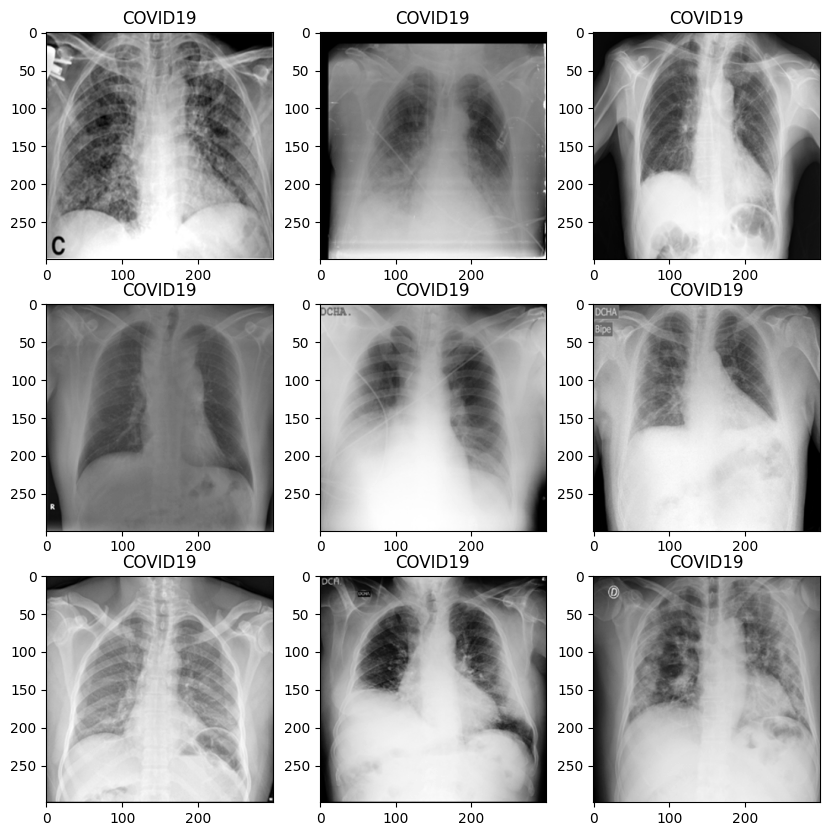

In [ ]:
#COVID-19 IMAGE
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img_path = fnames[0][i]  # Accessing individual image paths from the COVID category
    img = plt.imread(img_path)  # Reading the image using plt.imread
    plt.imshow(img, cmap='gray')  # Displaying the image
    plt.title("COVID19")
plt.show()

In [ ]:
#NORMAL IMAGE
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img_path = fnames[1][i]  # Accessing individual image paths from the NORMAL category
    img = plt.imread(img_path)  # Reading the image using plt.imread
    plt.imshow(img, cmap='gray')  # Displaying the image
    plt.title("NORMAL")
plt.show()

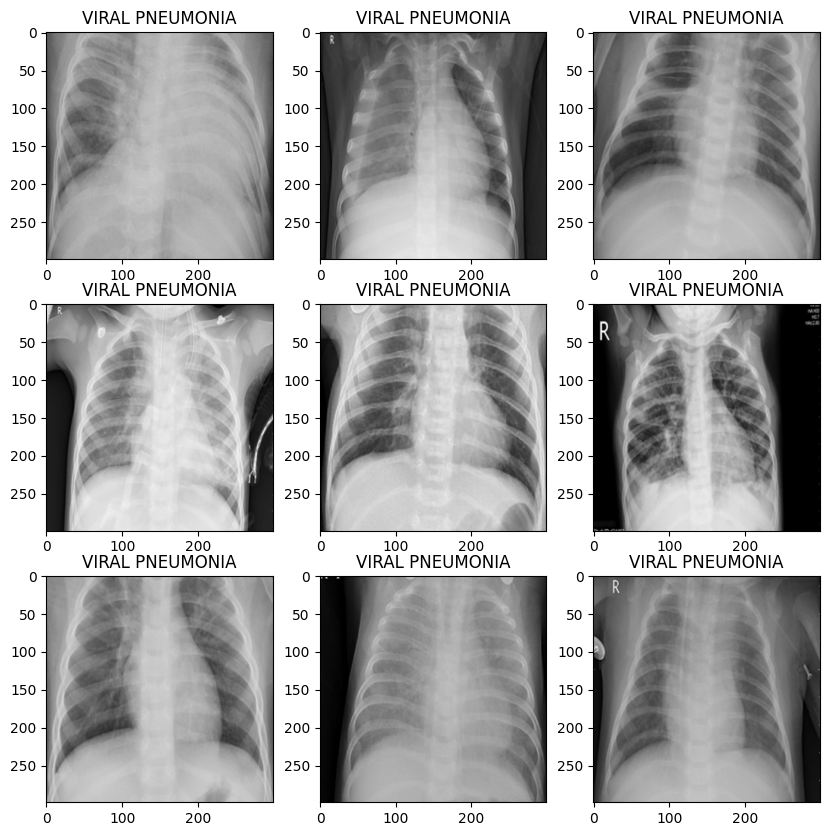

In [ ]:
# VIRAL PNEUMONIA IMAGE

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img_path = fnames[2][i]  # Accessing individual image paths from the VIRAL PNEUMONIA category
    img = plt.imread(img_path)  # Reading the image using plt.imread
    plt.imshow(img, cmap='gray')  # Displaying the image
    plt.title("VIRAL PNEUMONIA")
plt.show()

##EDA: **X** (feature input data) and **y** (labels) visualization and statistical analysis

X statistics overview:

In [ ]:
print(type(X))
print('Number of elements: ', len(X) )
print('Dimensions for all images', X.shape )
print('Minimum value of every image: ', X.min().round() )
print('Maximum value of every image: ', X.max() )
print('Mean value of every image: ', X.mean() )
print('Standard deviation of every image: ', X.std() )

<class 'numpy.ndarray'>
Number of elements:  4032
Dimensions for all images (4032, 192, 192, 3)
Minimum value of every image:  -0.0
Maximum value of every image:  1.0
Mean value of every image:  0.51352596
Standard deviation of every image:  0.25146645


X statistics by categories:

In [ ]:
# Create a list of file paths for each category
category_filepaths = [fnames[0], fnames[1], fnames[2]]

# Initialize lists to store statistics for each category
category_statistics = []

# Iterate over each category
for filepaths in category_filepaths:
    # Preprocess images in the current category
    preprocessed_images = [preprocessor(filepath) for filepath in filepaths]

    # Convert list of preprocessed images to NumPy array
    preprocessed_images_array = np.array(preprocessed_images)

    # Compute statistics for the current category
    category_stats = {
        'mean': np.mean(preprocessed_images_array),
        'std': np.std(preprocessed_images_array),
        'min': np.min(preprocessed_images_array).round(),
        'max': np.max(preprocessed_images_array)
    }

    # Append statistics to the list
    category_statistics.append(category_stats)

# Print statistics for each category
for i, stats in enumerate(category_statistics):
    print(f"Statistics for Category {i+1}:")
    print(f"Mean: {stats['mean']:.4f}")
    print(f"Standard Deviation: {stats['std']:.4f}")
    print(f"Minimum Value: {stats['min']:.4f}")
    print(f"Maximum Value: {stats['max']:.4f}")
    print()

Statistics for Category 1:
Mean: 0.5423
Standard Deviation: 0.2434
Minimum Value: -0.0000
Maximum Value: 1.0000

Statistics for Category 2:
Mean: 0.5086
Standard Deviation: 0.2613
Minimum Value: -0.0000
Maximum Value: 1.0000

Statistics for Category 3:
Mean: 0.4897
Standard Deviation: 0.2465
Minimum Value: -0.0000
Maximum Value: 1.0000



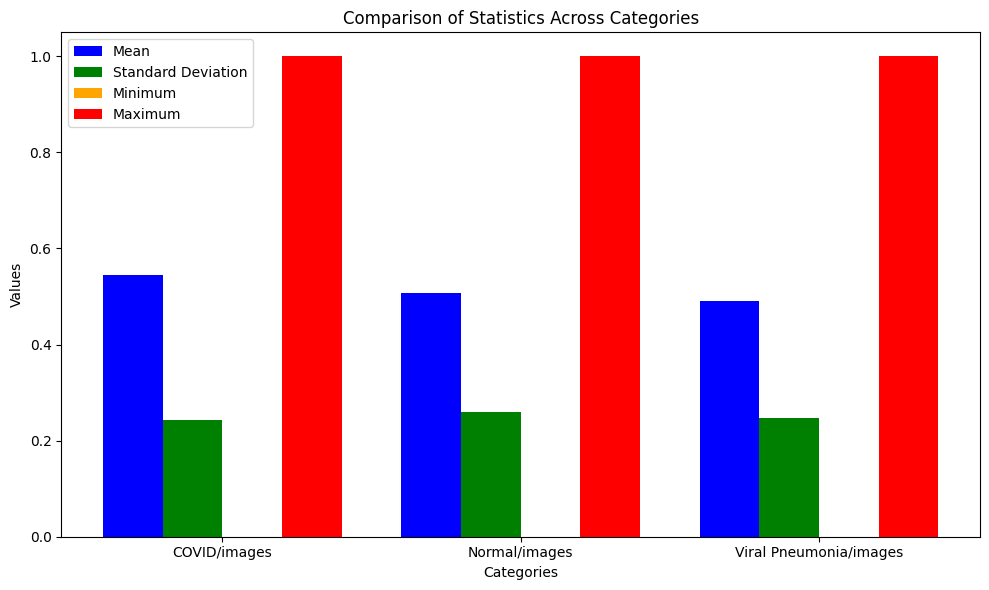

In [ ]:
# Define statistics names
stat_names = ['Mean', 'Standard Deviation', 'Minimum', 'Maximum']

# Define statistics values
mean_values = [stats['mean'] for stats in category_statistics]
std_values = [stats['std'] for stats in category_statistics]
min_values = [stats['min'] for stats in category_statistics]
max_values = [stats['max'] for stats in category_statistics]

# Define bar width
bar_width = 0.2
index = np.arange(len(categories))

# Plotting side-by-side bar graphs for each statistic
plt.figure(figsize=(10, 6))
plt.bar(index - bar_width * 1.5, mean_values, bar_width, label='Mean', color='blue')
plt.bar(index - bar_width * 0.5, std_values, bar_width, label='Standard Deviation', color='green')
plt.bar(index + bar_width * 0.5, min_values, bar_width, label='Minimum', color='orange')
plt.bar(index + bar_width * 1.5, max_values, bar_width, label='Maximum', color='red')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Comparison of Statistics Across Categories')
plt.xticks(index, categories)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

y counts by categories:

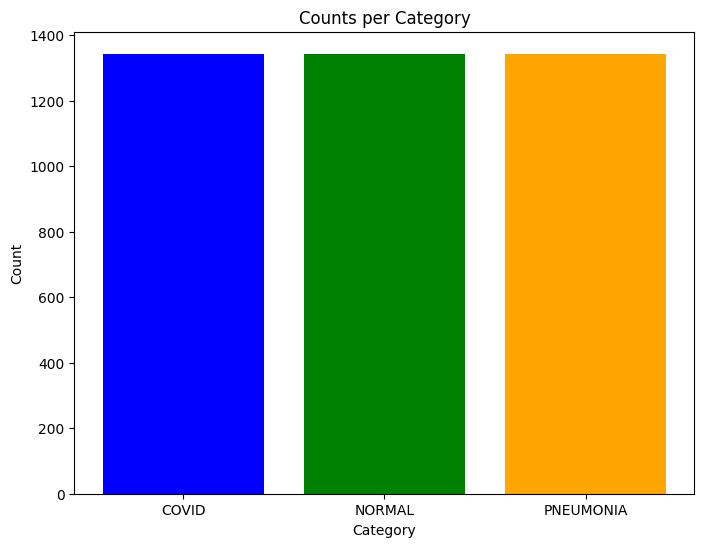

In [ ]:
from collections import Counter

# Count occurrences of each category
category_counts = Counter(y_labels)

# Extract categories and counts
cat = list(category_counts.keys())
cnt = list(category_counts.values())

# Plotting bar chart for each category
plt.figure(figsize=(8, 6))
plt.bar(cat, cnt, color=['blue', 'green', 'orange'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts per Category')
plt.show()

# **STEP 4: Analyzing and Augmenting Dataset <span style="color:yellow;">(10pts)</span>**


What are the data analysis steps you performed? What did you notice? What are you conclusions?

In [ ]:
## Your answer here

##I performed exploratory data analysis on X and y dataset. For data overview, I examine the data type, dimensions and basic statistics for the X dataset
## (feature input) in general along with metrics within each category. Due to effective preprocessing, we have a balanced number of input in each category
## (1344), images of the same size(192*192) and color scheme(RBG). The means(around 0.5) and s.t.d(around 0.25) for all categories are similar, indicating
## there is no significant outliers in the dataset. The data analysis part is concluded with visualization for both X and y across categories.


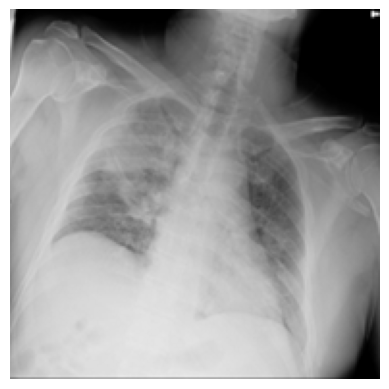

In [ ]:
# Implement Data Augmentation steps

plt.axis('off')
plt.imshow(X[0])

In [10]:
# Define the ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [ ]:
aug_iter = datagen.flow(X, batch_size=1)

In [ ]:
X_sample = X

# Apply augmentation directly to the original images stored in X_sample
num_augmented_images = 4032
aug_iter = datagen.flow(X_sample, batch_size=1)

# Overwrite original images in X with augmented images
for i in range(len(X_sample)):
    augmented_images = next(aug_iter)
    X_sample[i] = augmented_images[0]

# Verify the shape of X
print("Shape of X:", X_sample.shape)

Shape of X: (4032, 192, 192, 3)


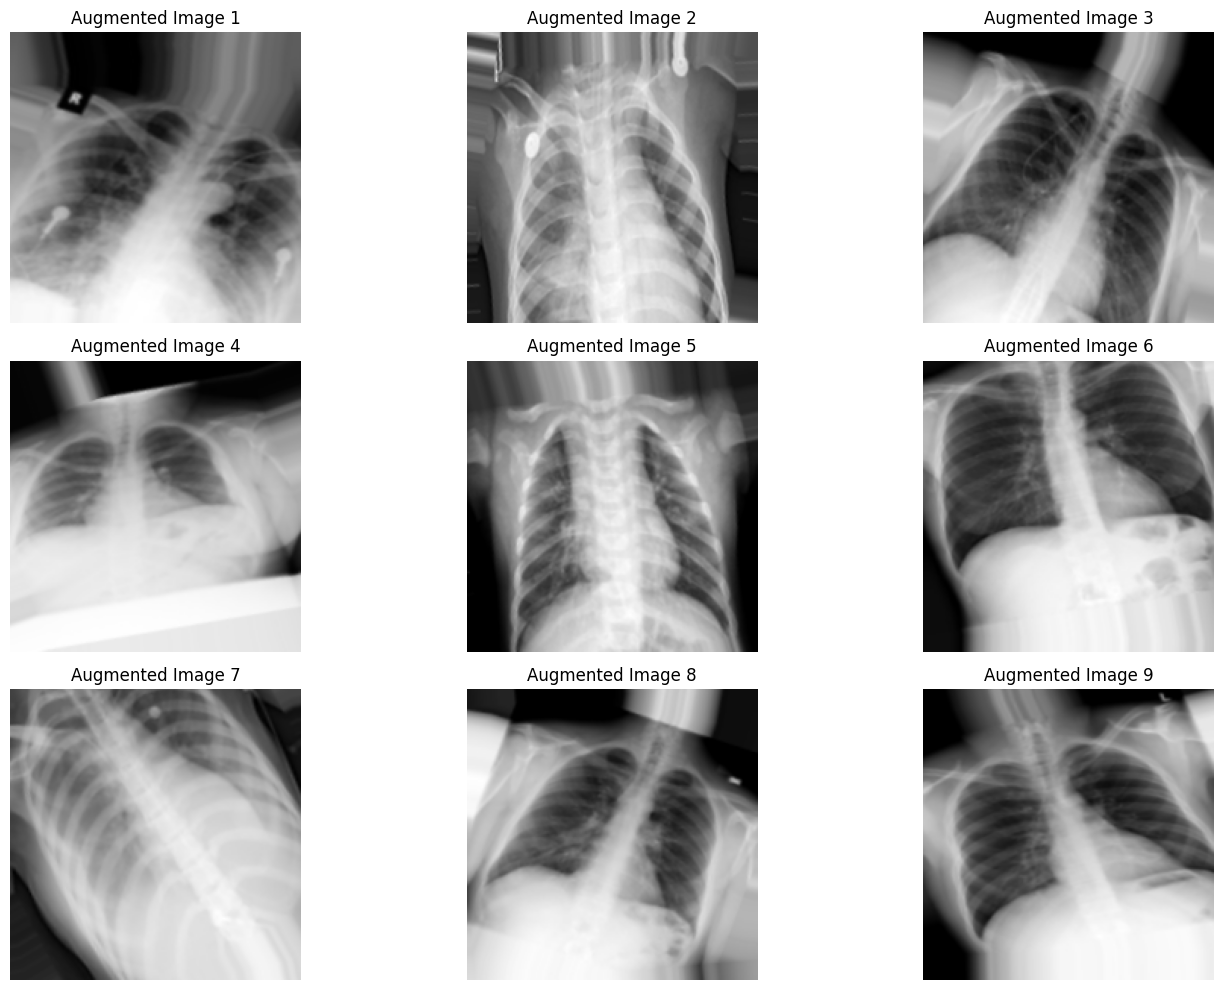

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
# Visualize augmented images
plt.figure(figsize=(15, 10))
for i in range(9):
    augmented_images = next(aug_iter)
    augmented_image = array_to_img(augmented_images[0])
    plt.subplot(3, 3, i+1)
    plt.imshow(augmented_image)
    plt.title(f'Augmented Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

What specific preprocessing and augmentation strategies did you apply to your dataset, and why? How would these strategies improve your model's training and generalization?

In [ ]:
## During Preprocessing:
# Converts the image to RGB format to ensure consistent channel ordering.
# Resizes the image to the specified dimensions of (192, 192).
# Performs min-max normalization to scale pixel values between 0 and 1. Min-max normalization ensures that all pixel values are on a similar scale.
# This prevents features with larger scales from dominating the learning process, which can lead to convergence issues and slower training.
# Reshapes the image array to the final shape (192, 192, 3) suitable for Keras.

##During Image Augementation:
# Randomly zoom in or out up to 10% of the image. This encourages the model to learn features at different scales and viewpoints,
# making it more robust to variations in object size and distance.

# Randomly rotate the image clockwise or counterclockwise by up to 15 degrees.This alsp helps the model learn invariant features regardless of the object's
# rotation, making it more resilient to changes in viewpoint.

# Randomly flips the images horizontally with a probability of 0.5. Horizontal flip augmentation creates variations in the orientation of objects within
# the images. The model learns to recognize objects regardless of their left-right orientation. enhancing the model's ability to generalize.
# These techniques introduce variations in the training data, which can help improve the model's robustness and generalization performance.

# **STEP 5: Splitting Dataset**

**No coding to be done here**

In [11]:
# ======Train test split resized images (Hackathon Note!! Use same train test split to be able to submit predictions to leaderboard!)=======================================
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.32, random_state = 1987)

X_test.shape, y_test.shape

((1291, 192, 192, 3), (1291, 3))

In [12]:
#Clear objects from memory

del(X)
del(y)
del(preprocessed_image_data)

In [13]:
#Save data to be able to reload quickly if memory crashes or if you run Runtime>Restart Runtime
import pickle


# Open a file and use dump()
with open('X_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_train, file)


# Open a file and use dump()
with open('X_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_test, file)


# Open a file and use dump()
with open('y_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_train, file)


# Open a file and use dump()
with open('y_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_test, file)

In [6]:
#If you run out of Colab memory restart runtime, reload data and try again
import pickle

# Open the file in binary mode
with open('X_train.pkl', 'rb') as file:
    # Call load method to deserialze
    X_train = pickle.load(file)

# Open the file in binary mode
with open('y_train.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)

# Open the file in binary mode
with open('X_test.pkl', 'rb') as file:
    # Call load method to deserialze
    X_test = pickle.load(file)

# Open the file in binary mode
with open('y_test.pkl', 'rb') as file:
    # Call load method to deserialze
    y_test = pickle.load(file)

# **STEP 6: Model Training and parameter tuning <span style="color:yellow;"> (45pts)</span>**

**Define your model architecture, define the model parameters, define the training parameters, define the training values. <br><br>
Use the code provided below as a reference.<br><br>
Test out as many models here as you want, but submit (to aimodelshare) only your final models. Excessive submissions will be penalized.<br><br>**


# **STEP 6(a): Custom CNN based models**

You will build a minimum of 2 CNN models. The depth of all models should be a minimum of 12 Convolutional layers (not counting BatchNorms, Pools and Activations). Print model summaries with Input shape defined.

# NOTE :

**In the following sections, keep proper track of your experimentations, models (name them properly), their histories (both as csv's and exported images of loss curves), evaluations and results (export csv's and keep track), and their saved model exports (.h files).**

You will need to upload the final saved models and download them later as weights to build an inference engine. Your results should be reproducible, so use random seeds at appropriate places.

In [7]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

### **6(a)-1 CNN1**

In [8]:
from tensorflow.python.keras.callbacks import ReduceLROnPlateau

In [17]:
with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.

  model_CNN1 = tf.keras.Sequential([
    # input: images of size Sample size, height, width, channels 1x192x192x3 pixels (the three stands for RGB channels)
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=(192, 192, 3)),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=128, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=256, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=256, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    # classifying into 3 categories
    tf.keras.layers.Dense(3, activation='softmax')
  ])

  red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs

  model_CNN1.compile(
    optimizer="adam", # to use callback set lr arg such as Adam(lr=0.001) instead
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
    )

  # Fitting the CNN to the Training set
  history_CNN1 = model_CNN1.fit(X_train, y_train, epochs=15, verbose=1, validation_split=0.2, callbacks=[red_lr]) #, callbacks=[red_lr]) for callback that automatically adjusts lr


Epoch 1/15
69/69 [==============================] - 27s 148ms/step - loss: 0.9668 - accuracy: 0.4845 - val_loss: 0.6949 - val_accuracy: 0.6740 - lr: 0.0010
Epoch 2/15
69/69 [==============================] - 6s 83ms/step - loss: 0.6266 - accuracy: 0.7199 - val_loss: 0.5845 - val_accuracy: 0.7231 - lr: 0.0010
Epoch 3/15
69/69 [==============================] - 6s 83ms/step - loss: 0.5510 - accuracy: 0.7536 - val_loss: 0.4925 - val_accuracy: 0.7741 - lr: 0.0010
Epoch 4/15
69/69 [==============================] - 6s 82ms/step - loss: 0.4800 - accuracy: 0.7879 - val_loss: 0.4573 - val_accuracy: 0.8124 - lr: 0.0010
Epoch 5/15
69/69 [==============================] - 6s 85ms/step - loss: 0.3881 - accuracy: 0.8349 - val_loss: 0.3715 - val_accuracy: 0.8597 - lr: 0.0010
Epoch 6/15
69/69 [==============================] - 6s 90ms/step - loss: 0.3322 - accuracy: 0.8618 - val_loss: 0.4090 - val_accuracy: 0.8506 - lr: 0.0010
Epoch 7/15
69/69 [==============================] - 7s 98ms/step - loss: 0

<ipython-input-14-cf9fe2eb53b1>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


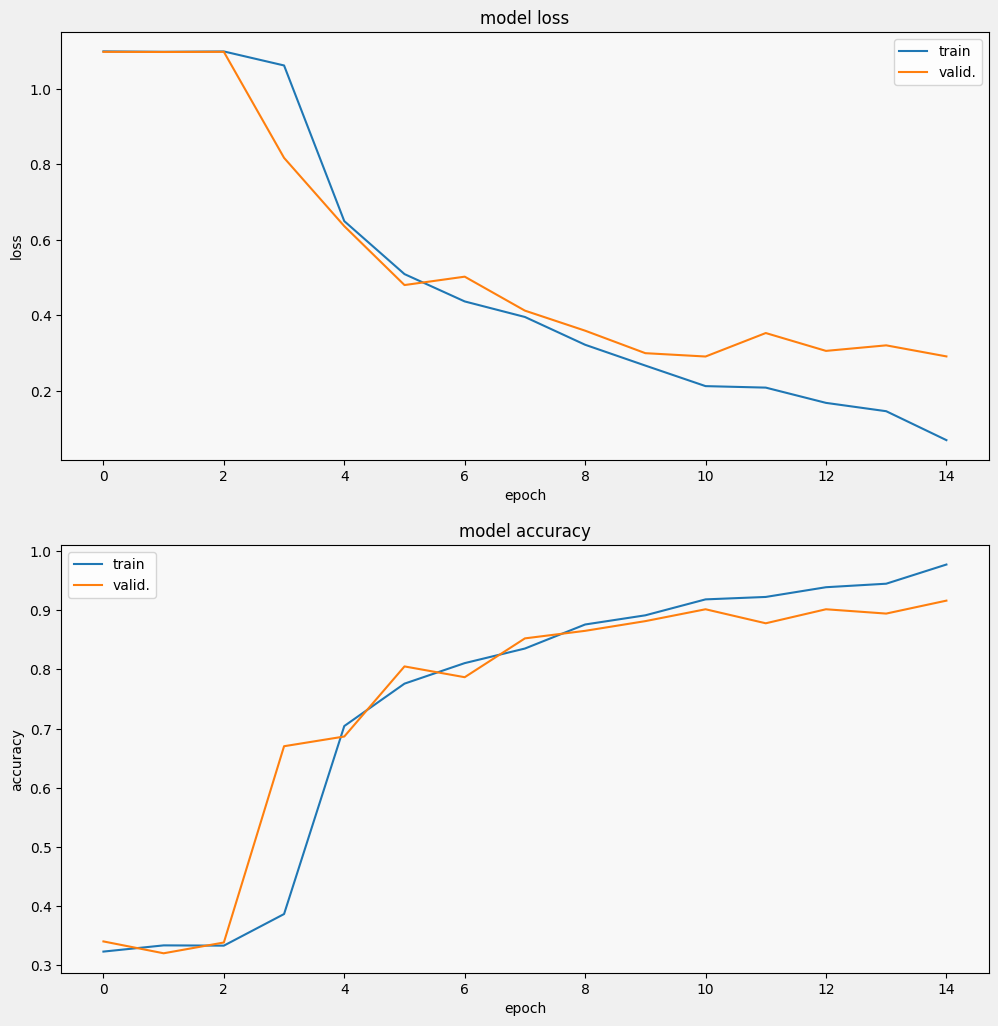

In [17]:
display_training_curves(history_CNN1.history['loss'], history_CNN1.history['val_loss'], 'loss', 211)
display_training_curves(history_CNN1.history['accuracy'], history_CNN1.history['val_accuracy'], 'accuracy', 212)

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model_CNN1.evaluate(X_test, y_test)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

41/41 [==============================] - 2s 50ms/step - loss: 0.3263 - accuracy: 0.8970
Test Loss: 0.3263404667377472
Test Accuracy: 0.8969790935516357


In [19]:
# Convert the history object to a DataFrame
df_CNN1 = pd.DataFrame(history_CNN1.history)
# Specify the file path to save the CSV file
file_path = "model_CNN1_history.csv"
# Save the DataFrame to a CSV file
df_CNN1.to_csv(file_path, index=False)

In [ ]:
model_CNN1.save("model_CNN1.h5", save_format="h5")

In [ ]:
# Reload model and data
model_CNN1 = tf.keras.models.load_model('model_CNN1.h5',compile=False)
model_CNN1.compile(
    optimizer="adam",
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])
model_CNN1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 192, 192, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 192, 192, 32)      1056      
                                                                 
 max_pooling2d (MaxPooling2  (None, 96, 96, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 64)        4160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                   

### **6(a)-2 CNN2**

In [9]:
# Define a learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr  # Keep the initial learning rate for the first 10 epochs
    else:
        return lr * tf.math.exp(-0.1)  # Decay the learning rate exponentially after 10 epochs

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)


In [22]:
with tf.device('/device:GPU:0'):  # "/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.
    model_CNN2 = tf.keras.Sequential([
        # input: images of size 192x192x3 pixels (the three stands for RGB channels)
        tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=(192, 192, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=2),
        tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(kernel_size=1, filters=64, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=2),
        tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(kernel_size=1, filters=128, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=2),
        tf.keras.layers.Conv2D(kernel_size=3, filters=256, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(kernel_size=1, filters=256, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=2),
        tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=2),
        tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),
        # classifying into 3 categories
        tf.keras.layers.Dense(3, activation='softmax')
    ])

model_CNN2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# Fitting the CNN to the Training set
history_CNN2 = model_CNN2.fit(X_train, y_train, epochs=15, verbose=1, validation_split=0.2, callbacks=[lr_callback])


Epoch 1/15
69/69 [==============================] - 16s 119ms/step - loss: 1.1704 - accuracy: 0.7920 - val_loss: 3.1218 - val_accuracy: 0.3206 - lr: 0.0010
Epoch 2/15
69/69 [==============================] - 8s 113ms/step - loss: 0.7662 - accuracy: 0.8499 - val_loss: 14.9422 - val_accuracy: 0.3406 - lr: 0.0010
Epoch 3/15
69/69 [==============================] - 8s 114ms/step - loss: 0.5775 - accuracy: 0.8878 - val_loss: 16.0417 - val_accuracy: 0.3552 - lr: 0.0010
Epoch 4/15
69/69 [==============================] - 8s 113ms/step - loss: 0.4023 - accuracy: 0.9097 - val_loss: 5.2911 - val_accuracy: 0.5519 - lr: 0.0010
Epoch 5/15
69/69 [==============================] - 8s 114ms/step - loss: 0.3223 - accuracy: 0.9266 - val_loss: 2.9962 - val_accuracy: 0.5920 - lr: 0.0010
Epoch 6/15
69/69 [==============================] - 8s 114ms/step - loss: 0.2312 - accuracy: 0.9411 - val_loss: 1.6036 - val_accuracy: 0.7541 - lr: 0.0010
Epoch 7/15
69/69 [==============================] - 8s 113ms/step -

<ipython-input-14-cf9fe2eb53b1>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


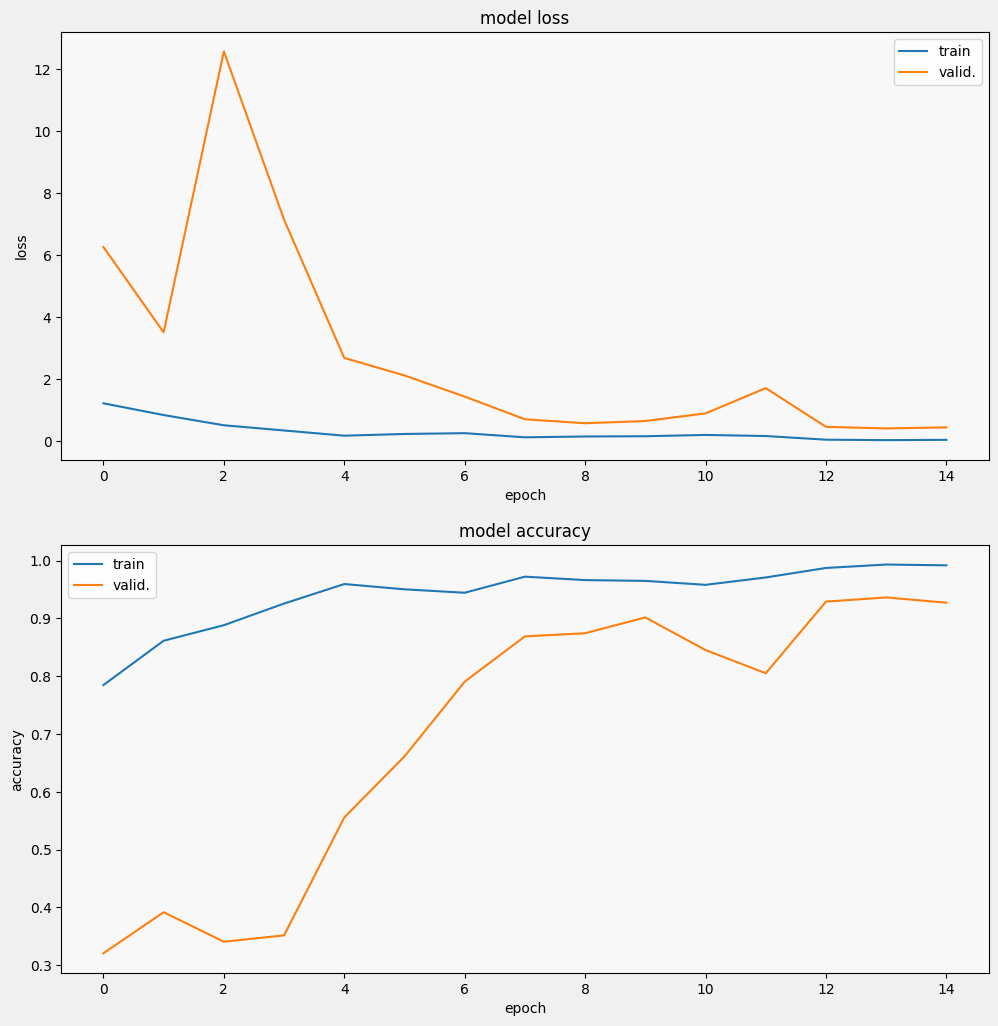

In [28]:
display_training_curves(history_CNN2.history['loss'], history_CNN2.history['val_loss'], 'loss', 211)
display_training_curves(history_CNN2.history['accuracy'], history_CNN2.history['val_accuracy'], 'accuracy', 212)

In [29]:
# Evaluate the model on the test data
loss, accuracy = model_CNN2.evaluate(X_test, y_test)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

41/41 [==============================] - 1s 35ms/step - loss: 0.4481 - accuracy: 0.9311
Test Loss: 0.4481033682823181
Test Accuracy: 0.9310612082481384


In [23]:
# Convert the history object to a DataFrame
df_CNN2 = pd.DataFrame(history_CNN2.history)
# Specify the file path to save the CSV file
file_path = "model_CNN2_history.csv"
# Save the DataFrame to a CSV file
df_CNN2.to_csv(file_path, index=False)

In [24]:
model_CNN2.save("model_CNN2.h5", save_format="h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
# Reload model and data
model_CNN2 = tf.keras.models.load_model('model_CNN2.h5', compile=False)
model_CNN2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])
model_CNN2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 192, 192, 32)      896       
                                                                 
 batch_normalization_36 (Ba  (None, 192, 192, 32)      128       
 tchNormalization)                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 192, 192, 32)      1056      
                                                                 
 batch_normalization_37 (Ba  (None, 192, 192, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 96, 96, 32)        0         
 g2D)                                                            
                                                      

1. What motivated your specific architectural design choices when implementing your custom CNNs? Discuss the reasoning behind the number of layers, types of layers (convolutional, pooling, fully connected, etc.), and their configurations.
2. Which regularization techniques and callbacks did you implement to prevent overfitting? Explain how you chose where to apply these techniques and their effectiveness.
3. Describe your approach to hyperparameter tuning. How did you select the values for learning rate, batch size, and number of epochs? Discuss any strategies you used to find the optimal hyperparameters.
4. Which loss function and optimizer did you choose for training your CNN, and why? How do these choices impact the convergence and accuracy of your model?
5. Reflect on a significant challenge you encountered during the implementation of your CNN. How did you overcome this challenge, and what did you learn from it?

1. **Architectural Design Choices:**
   - **Number of Layers:** The model (`model_CNN2`) consists of multiple convolutional layers followed by batch normalization and max-pooling layers to extract features from the input images. The depth of the model (number of layers) is chosen to be sufficiently deep (12 convolutional layers) to capture complex patterns and variations in the data.
   - **Types of Layers:** Convolutional layers are used to apply filters to the input images, capturing spatial hierarchies of features. Batch normalization layers help in stabilizing and accelerating the training process by normalizing the activations. Max-pooling layers are used for downsampling, reducing the spatial dimensions of the feature maps while retaining important information.
   - **Configurations:** Each convolutional layer is followed by a batch normalization layer and then a max-pooling layer to ensure smooth training and efficient feature extraction. The kernel sizes and filter numbers are chosen empirically to balance model complexity and computational efficiency.

2. **Regularization Techniques and Callbacks:**
   - **Regularization:** Batch normalization acts as a form of regularization by reducing internal covariate shift, helping to prevent overfitting by stabilizing the training process. Dropout layers could also be added to the model to further prevent overfitting by randomly dropping neurons during training.
   - **Callbacks:** The `ReduceLROnPlateau` callback is implemented to reduce the learning rate by a factor of 0.1 if the validation accuracy fails to improve after 3 epochs. This helps in fine-tuning the learning process and avoiding overshooting.

3. **Hyperparameter Tuning:**
   - **Learning Rate, Batch Size, and Number of Epochs:** The learning rate, batch size, and number of epochs are typically chosen through experimentation and validation on a validation set. A range of values for each hyperparameter is tested, and the combination that yields the best performance on the validation set is selected. Techniques like grid search, random search, or automated hyperparameter optimization algorithms (e.g., Bayesian optimization) can be used for this purpose.

4. **Loss Function and Optimizer:**
   - **Loss Function:** Categorical cross-entropy loss function (`'categorical_crossentropy'`) is chosen since the problem involves multi-class classification.
   - **Optimizer:** Adam optimizer (`tf.keras.optimizers.Adam(lr=0.001)`) is chosen due to its adaptive learning rate capabilities, which can accelerate convergence and handle sparse gradients efficiently. The initial learning rate (`lr`) is set to 0.001 based on empirical observations and common practice.

5. **Significant Challenge:**
   - A significant challenge during the implementation might be tuning the hyperparameters effectively. This involves finding the right balance between model complexity and generalization performance. Experimenting with various architectures, regularization techniques, learning rates, and batch sizes to achieve the best performance without overfitting can be time-consuming and computationally expensive.

# **STEP 6(b): Transfer Learning models**

You will use a minimum of 2 Pre-trained models and Fine-tune them on our dataset. Take careful choices about which models you get from the internet. Cite their usage properly within this notebook, and in the Github repo (instructions in last section).


### **6(b)-1 Transfer Learning model: Desnenet**

In [26]:
pretrained_densenet = tf.keras.applications.DenseNet201(input_shape=(192, 192, 3), weights='imagenet', include_top=False)

for layer in pretrained_densenet.layers:
  layer.trainable = False

x1 = pretrained_densenet.output
x1 = tf.keras.layers.AveragePooling2D(name="averagepooling2d_head")(x1)
x1 = tf.keras.layers.Flatten(name="flatten_head")(x1)
x1 = tf.keras.layers.Dense(64, activation="relu", name="dense_head")(x1)
x1 = tf.keras.layers.Dropout(0.5, name="dropout_head")(x1)
model_out = tf.keras.layers.Dense(3, activation='softmax', name="predictions_head")(x1)

model_densenet = Model(inputs=pretrained_densenet.input, outputs=model_out)
model_densenet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
    )

history_densenet=model_densenet.fit(X_train, y_train, epochs = 15, validation_split= 0.2,callbacks=[lr_callback])

74836368/74836368 [==============================] - 1s 0us/step
Epoch 1/15
69/69 [==============================] - 48s 421ms/step - loss: 0.7702 - accuracy: 0.6839 - val_loss: 0.2960 - val_accuracy: 0.8725 - lr: 0.0010
Epoch 2/15
69/69 [==============================] - 12s 167ms/step - loss: 0.4286 - accuracy: 0.7687 - val_loss: 0.2640 - val_accuracy: 0.8980 - lr: 0.0010
Epoch 3/15
69/69 [==============================] - 10s 151ms/step - loss: 0.3866 - accuracy: 0.7984 - val_loss: 0.2219 - val_accuracy: 0.9253 - lr: 0.0010
Epoch 4/15
69/69 [==============================] - 10s 141ms/step - loss: 0.3315 - accuracy: 0.8458 - val_loss: 0.1934 - val_accuracy: 0.9308 - lr: 0.0010
Epoch 5/15
69/69 [==============================] - 10s 141ms/step - loss: 0.2833 - accuracy: 0.8755 - val_loss: 0.1713 - val_accuracy: 0.9326 - lr: 0.0010
Epoch 6/15
69/69 [==============================] - 10s 149ms/step - loss: 0.2709 - accuracy: 0.8869 - val_loss: 0.1717 - val_accuracy: 0.9435 - lr: 0.0010

<ipython-input-14-cf9fe2eb53b1>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


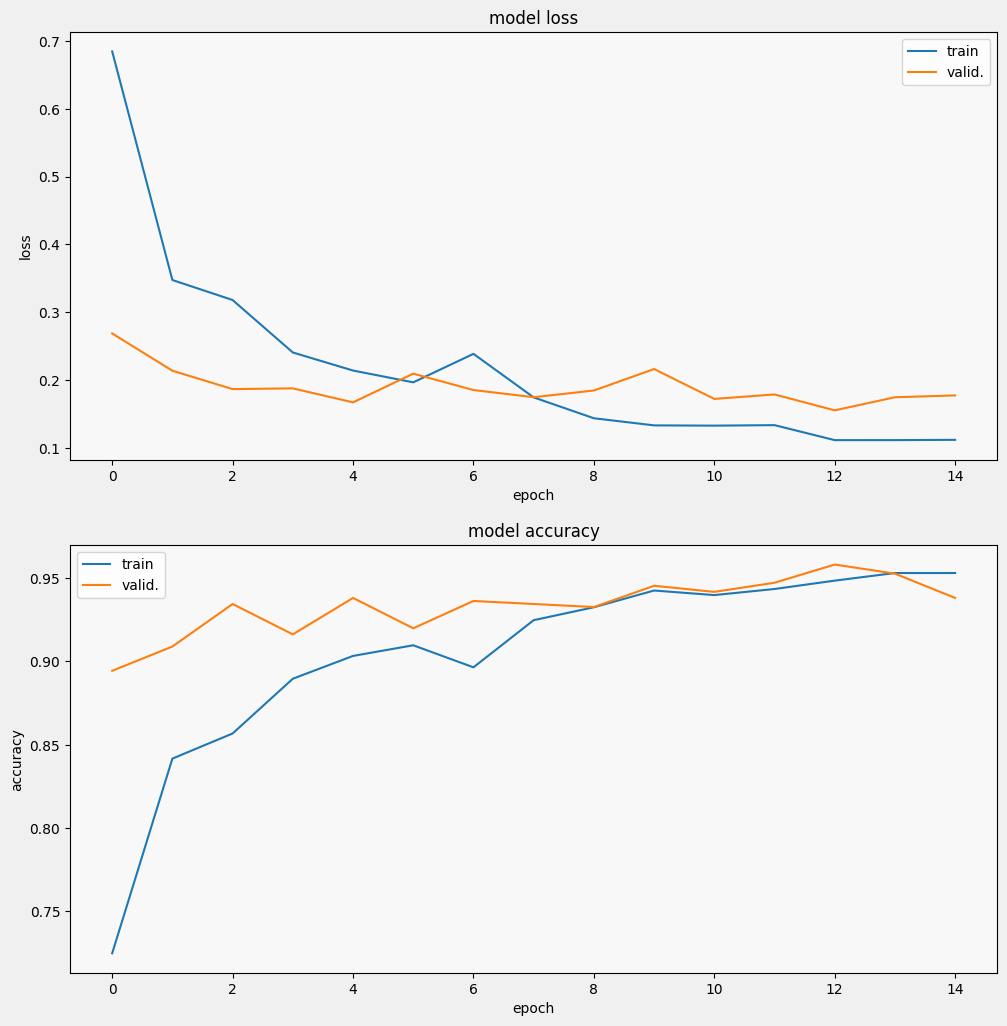

In [35]:
display_training_curves(history_densenet.history['loss'], history_densenet.history['val_loss'], 'loss', 211)
display_training_curves(history_densenet.history['accuracy'], history_densenet.history['val_accuracy'], 'accuracy', 212)

In [36]:
# Evaluate the model on the test data
loss, accuracy = model_densenet.evaluate(X_test, y_test)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

41/41 [==============================] - 10s 241ms/step - loss: 0.1905 - accuracy: 0.9380
Test Loss: 0.1905299723148346
Test Accuracy: 0.9380325078964233


In [27]:
model_densenet.save("model_densenet.h5", save_format="h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
# Convert the history object to a DataFrame
df_densenet = pd.DataFrame(history_densenet.history)
# Specify the file path to save the CSV file
file_path = "model_densenet_history.csv"
# Save the DataFrame to a CSV file
df_densenet.to_csv(file_path, index=False)

In [62]:
# Reload model and data
model_densenet = tf.keras.models.load_model('model_densenet.h5',compile=False)
model_densenet.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])
model_densenet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 192, 192, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 198, 198, 3)          0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 96, 96, 64)           9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 96, 96, 64)           256       ['conv1/conv[0][0]']    

### **6(b)-2 Transfer Learning model: Desnenet**

In [ ]:
!pip install efficientnet
import efficientnet.tfkeras as efn

In [17]:
# https://github.com/keras-team/keras/issues/9064

pretrained_efnet = efn.EfficientNetB7(input_shape=(192, 192, 3), weights='noisy-student', include_top=False)

for layer in pretrained_efnet.layers:
  layer.trainable = False

x2 = pretrained_efnet.output
x2 = tf.keras.layers.AveragePooling2D(name="averagepooling2d_head")(x2)
x2 = tf.keras.layers.Flatten(name="flatten_head")(x2)
x2 = tf.keras.layers.Dense(64, activation="relu", name="dense_head")(x2)
x2 = tf.keras.layers.Dropout(0.5, name="dropout_head")(x2)
model_out = tf.keras.layers.Dense(3, activation='softmax', name="predictions_head")(x2)

model_efnet = Model(inputs=pretrained_efnet.input, outputs=model_out)

model_efnet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
    )
history_efnet=model_efnet.fit(X_train, y_train, epochs = 15, validation_split=0.2,callbacks=[lr_callback])

Epoch 1/15
69/69 [==============================] - 63s 477ms/step - loss: 1.8035 - accuracy: 0.4580 - val_loss: 1.0196 - val_accuracy: 0.5428 - lr: 0.0010
Epoch 2/15
69/69 [==============================] - 24s 342ms/step - loss: 0.9460 - accuracy: 0.5192 - val_loss: 1.0335 - val_accuracy: 0.3479 - lr: 0.0010
Epoch 3/15
69/69 [==============================] - 24s 352ms/step - loss: 0.8823 - accuracy: 0.5721 - val_loss: 0.7691 - val_accuracy: 0.7013 - lr: 0.0010
Epoch 4/15
69/69 [==============================] - 23s 341ms/step - loss: 0.9121 - accuracy: 0.5903 - val_loss: 0.8560 - val_accuracy: 0.7468 - lr: 0.0010
Epoch 5/15
69/69 [==============================] - 24s 345ms/step - loss: 0.7969 - accuracy: 0.5995 - val_loss: 0.7564 - val_accuracy: 0.7705 - lr: 0.0010
Epoch 6/15
69/69 [==============================] - 24s 347ms/step - loss: 0.7776 - accuracy: 0.6054 - val_loss: 0.7556 - val_accuracy: 0.7760 - lr: 0.0010
Epoch 7/15
69/69 [==============================] - 24s 343ms/st

In [20]:
display_training_curves(history_efnet.history['loss'], history_efnet.history['val_loss'], 'loss', 211)
display_training_curves(history_efnet.history['accuracy'], history_efnet.history['val_accuracy'], 'accuracy', 212)

<ipython-input-19-cf9fe2eb53b1>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


In [33]:
# Evaluate the model on the test data
loss, accuracy = model_efnet.evaluate(X_test, y_test)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

41/41 [==============================] - 13s 309ms/step - loss: 0.3677 - accuracy: 0.8528
Test Loss: 0.36770641803741455
Test Accuracy: 0.852827250957489


In [20]:
# Convert the history object to a DataFrame
df_efnet = pd.DataFrame(history_efnet.history)
# Specify the file path to save the CSV file
file_path = "model_efnet_history.csv"
# Save the DataFrame to a CSV file
df_efnet.to_csv(file_path, index=False)

In [18]:
model_efnet.save("model_efnet.h5", save_format="h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
# Reload model and data
model_efnet = tf.keras.models.load_model("model_efnet.h5",compile=False)
model_efnet.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])
model_efnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 192, 192, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 96, 96, 64)           1728      ['input_1[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 96, 96, 64)           256       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activatio  (None, 96, 96, 64)           0         ['stem_bn[0][0]']         

##Note: efnet model couldn't be submmited to ai modelshare due to size.

1. Which Models did you try for Transfer Learning? What was the pre-trained model originally trained on?
2. Which models converged faster upon fine-tuning? Why do you think that happened?
3. How did you do fine-tuning on this dataset? (What layers did you add / freeze / unfreeze), How many parameters were there in total in the pretrained model you finetuned? How many trainable and untrainable?
4. How does the performance of your Transfer Learning model compare with a model trained from scratch on the same task? Discuss the advantages and potential limitations of using Transfer Learning in this context.
5. Throughout the coding process, what was the most difficult decision you had to make, and how did you arrive at your final choice?




1. I used DenseNet201 and EfficientNetB7 for transfer learning, which both are trained on ImageNet Dataset.
2. DenseNet201 converged faster upon fine-tuning. This could due to the difference in adjustable parameter size or pre-training task.
3. The pretrained network is loaded without the final classifcation head.I freeze the weights of the pretrained network and then add new head layers to be trained.
*   Densenet: Total params: 19428163 (74.11 MB)
Trainable params: 1106179 (4.22 MB)
Non-trainable params: 18321984 (69.89 MB)
*   efnet: Total params: 65572499 (250.14 MB)
Trainable params: 1474819 (5.63 MB)
Non-trainable params: 64097680 (244.51 MB)


4. Advantage and limitations
*   Transfer learning serves as regularization, preventing overfitting by initializing model parameters with pre-trained weights. This enhances generalization. Moreover, starting with pre-trained weights accelerates convergence during fine-tuning, leading to faster training.
*   Despite reducing training time, fine-tuning large pre-trained models demands significant computational resources. Also, pre-trained models may carry biases from the pre-training data, posing challenges if not aligned with the target task or when unbiased predictions are necessary.

# **STEP 7: Additional Models of your choice <span style="color:yellow;"> (10pts)</span>**

---


Please ensure that you are only using Keras / Tensorflow.

### **7.1 Pretrained VGG**

In [11]:
pretrained_vgg = tf.keras.applications.VGG16(input_shape=(192, 192, 3), weights='imagenet', include_top=False)

for layer in pretrained_vgg.layers:
  layer.trainable = False

x3 = pretrained_vgg.output
x3 = tf.keras.layers.AveragePooling2D(name="averagepooling2d_head")(x3)
x3 = tf.keras.layers.Flatten(name="flatten_head")(x3)
x3 = tf.keras.layers.Dense(128, activation="relu", name="dense_head")(x3)
x3 = tf.keras.layers.Dropout(0.5, name="dropout_head")(x3)
x3 = tf.keras.layers.Dense(64, activation="relu", name="dense_head_2")(x3)
x3 = tf.keras.layers.Dropout(0.5, name="dropout_head_2")(x3)
model_out = tf.keras.layers.Dense(3, activation='softmax', name="predictions_head")(x3)

model_vgg = Model(inputs=pretrained_vgg.input, outputs=model_out)

model_vgg.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
    )

history_vgg=model_vgg.fit(X_train, y_train, epochs = 15, validation_split=0.2,callbacks=[lr_callback])


58889256/58889256 [==============================] - 1s 0us/step
Epoch 1/15
69/69 [==============================] - 29s 235ms/step - loss: 0.8961 - accuracy: 0.5949 - val_loss: 0.4768 - val_accuracy: 0.8434 - lr: 0.0010
Epoch 2/15
69/69 [==============================] - 8s 114ms/step - loss: 0.5593 - accuracy: 0.7760 - val_loss: 0.3795 - val_accuracy: 0.8579 - lr: 0.0010
Epoch 3/15
69/69 [==============================] - 8s 117ms/step - loss: 0.4545 - accuracy: 0.8216 - val_loss: 0.2712 - val_accuracy: 0.9053 - lr: 0.0010
Epoch 4/15
69/69 [==============================] - 9s 134ms/step - loss: 0.3434 - accuracy: 0.8691 - val_loss: 0.2119 - val_accuracy: 0.9326 - lr: 0.0010
Epoch 5/15
69/69 [==============================] - 9s 137ms/step - loss: 0.3234 - accuracy: 0.8682 - val_loss: 0.2161 - val_accuracy: 0.9253 - lr: 0.0010
Epoch 6/15
69/69 [==============================] - 9s 138ms/step - loss: 0.2879 - accuracy: 0.8882 - val_loss: 0.1746 - val_accuracy: 0.9454 - lr: 0.0010
Epoc

<ipython-input-13-cf9fe2eb53b1>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


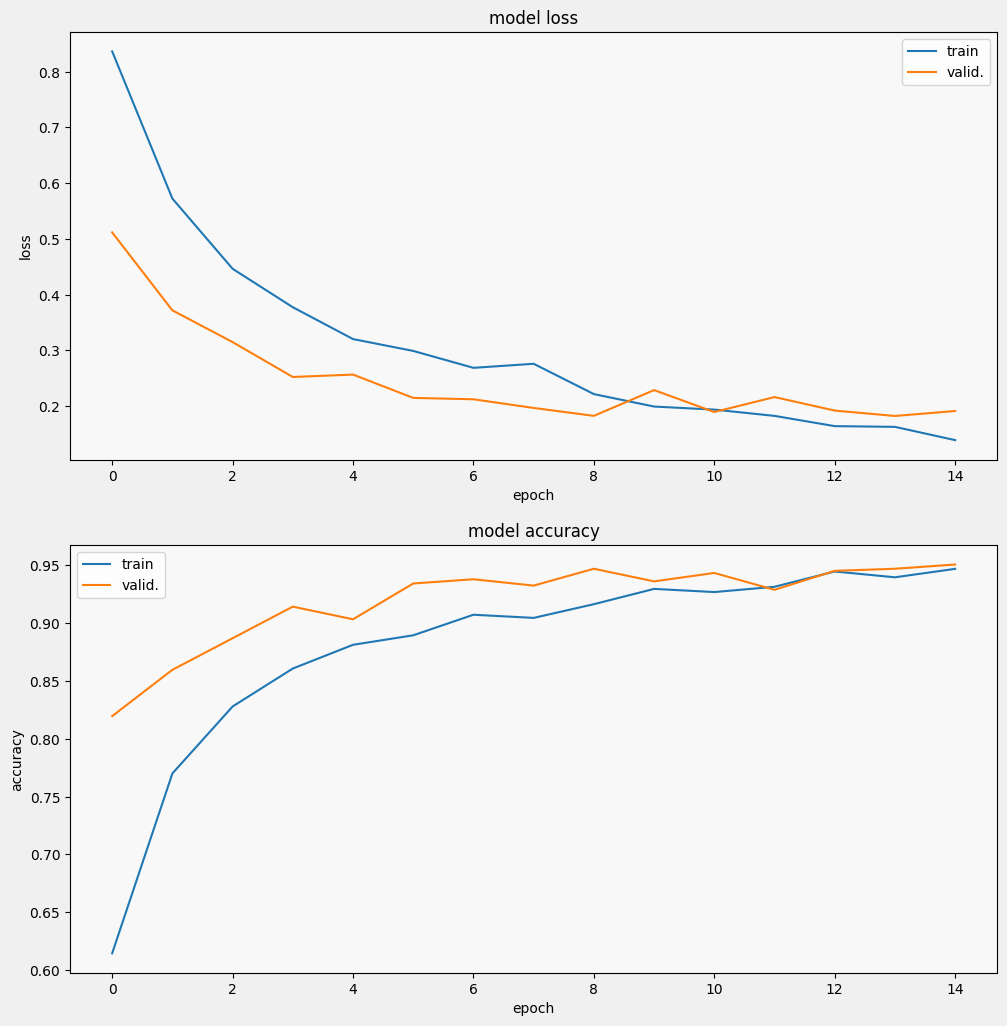

In [18]:
display_training_curves(history_vgg.history['loss'], history_vgg.history['val_loss'], 'loss', 211)
display_training_curves(history_vgg.history['accuracy'], history_vgg.history['val_accuracy'], 'accuracy', 212)

In [19]:
# Evaluate the model on the test data
loss, accuracy = model_vgg.evaluate(X_test, y_test)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

41/41 [==============================] - 6s 155ms/step - loss: 0.1515 - accuracy: 0.9481
Test Loss: 0.1515343189239502
Test Accuracy: 0.9481022357940674


In [14]:
# Convert the history object to a DataFrame
df_vgg = pd.DataFrame(history_vgg.history)
# Specify the file path to save the CSV file
file_path = "model_vgg_history.csv"
# Save the DataFrame to a CSV file
df_vgg.to_csv(file_path, index=False)

In [15]:
model_vgg.save("model_vgg.h5", save_format="h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
# Reload model and data
model_vgg = tf.keras.models.load_model('model_vgg.h5',compile=False)
model_vgg.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])
model_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 192, 192, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 192, 192, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 96, 96, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 96, 96, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 96, 96, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 48, 48, 128)       0     

Is there a particular part of your code that you're especially proud of optimizing or simplifying? How did you achieve it?

Did you try any approaches and models taught outside class? What recently released papers / architectures do you wish you could implement given more time?

In [ ]:
# I would like to try pretrained models like OmniVec which is pretrained with cross modal sharing in mind. I would like to know whether it perform similarly
# well as the three models I deployed here which are all pretrained on ImageNet.

# **STEP 8: Analysis of your models (15 pts)**

Tabularize your results from different models, compare convergence rates, performance metrics and whichever aspects you deem suitable for comparison. Analyze and Discuss results exhaustively.

In [21]:
file_paths = ['model_CNN1_history.csv', 'model_CNN2_history.csv', 'model_densenet_history.csv', 'model_efnet_history.csv','model_vgg_history.csv']
dfs = [pd.read_csv(file) for file in file_paths]

# Calculate mean for each file
means_per_file = [df.mean() for df in dfs]

# Concatenate mean values into a single DataFrame
overall_mean_df = pd.concat(means_per_file, axis=1)
overall_mean_df.columns = ['model_CNN1_mean', 'model_CNN2_mean', 'model_densenet_mean', 'model_efnet_mean','model_vgg_mean']

# Set "test loss" and "test accuracy" equal to two lists of numbers
test_loss = [0.326340, 0.313657, 0.202394, 0.524444,0.151534]
test_accuracy = [0.896979, 0.941905, 0.951975, 0.797056,0.948102]
overall_mean_df.loc['test loss'] = test_loss
overall_mean_df.loc['test accuracy'] = test_accuracy

# Save the aggregated mean values into a new CSV file
overall_mean_df.to_csv('file_means.csv')

print("Mean values for each file saved to 'file_means.csv'")

overall_mean_df

Mean values for each file saved to 'file_means.csv'


model_CNN1_mean  model_CNN2_mean  model_densenet_mean  \
loss                  0.314950         0.297184             0.274006   
accuracy              0.861679         0.938656             0.879136   
val_loss              0.394202         3.521787             0.187627   
val_accuracy          0.854281         0.714147             0.933576   
lr                    0.001000         0.000916             0.000916   
test loss             0.326340         0.313657             0.202394   
test accuracy         0.896979         0.941905             0.951975   

               model_efnet_mean  model_vgg_mean  
loss                   0.741184        0.336085  
accuracy               0.652737        0.864994  
val_loss               0.567361        0.225433  
val_accuracy           0.806618        0.923376  
lr                     0.000607        0.000916  
test loss              0.524444        0.151534  
test accuracy          0.797056        0.948102

### **<span style="color:red;">Your Discussion here:</span>**

Apart from efnet, which has a significantly lower accuracy and large loss, the rest of the models all have a rather similar accuracy and loss value on training, validation and test set.

efnet have the most parameters among all the models deployed, however performed worst.This indicates that increase in model's parameter count doesn’t necessarily achieve better results.

For the two CNN models, the major difference was in adding batch normalization layer and applying a learning rate scheduler. This has induced major spikes in loss and large discrepency between validation and test accuracy. Batch normalization can potentially contribute to a gap between test and validation performance, particularly if not used properly. Problems like different behaviors during training and inference or data leakage could be the potential root causes.

# **STEP 9: Conclusions**



### **<span style="color:red;">Your Answer here:</span>**






*   Densenet121 and CNN2 were relatively better than CNN1, VGG16 and EfficientNetB7.
*   Parameter count increase doesn't necessarily achieve better results.
*   Learning rate scheduler could possibly lead to a faster convergence.
*   Batch noarmalization should be deployed with caustion.



# **STEP 10: Github Repo <span style="color:yellow;"> (15pts)</span>**

<b>Github Repo: </b>

You will exercise **Modularization** and Good Github organization: You should take the relevant code and make it into classes across different python (.py) files so that you can just import those files and/or classes and/or functions and/or modules, instantiate the model using them, load weights from your saved models, and start predicting on any new set of test images (not just the test set from this dataset).

Essentially, you should have a simple and clean **"front-end" notebook** where you download your trained and saved model(s) from say a personal drive link, and have an inference pipeline ready within a few lines of code to predict on any new unseen x-ray images.



<br><br>

In the **README.md** file of your repository should be an overall outline of your experiments, including the models you trained succesfully and have results for - summarized in a tabular way. You can include other details as well.

Look at different readme's across github to see how they are organized. Refer to [this resource](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to learn how to format the file.

- Example of a [Good Readme File](https://github.com/priyavrat-misra/xrays-and-gradcam#readme) (We have no affiliations with Author)
- Example of a [Bad Readme File](https://github.com/anubhavparas/image-classification-using-cnn)
(No offence is intended to Author)

<br><br>
In the **Final report** (.ipynb) notebook, put whatever code, visuals and results you think is relevant adhering to the modularization that you did. It is open ended, you should not just post a copy of this notebook for it.

<br><br>

Remember that this is your showcase to the public.
Cite the dataset as said before. Cite the open source models and any other models or weights you used for Transfer learning.


#### Do not forget to link the final Github repository containing the Front-end running notebook, your code, Readme and Final report at the top of this notebook.